In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'Log( M_bh/M)')

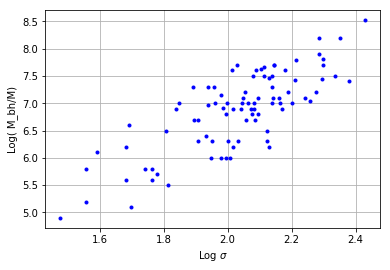

In [2]:
datos = pd.read_excel('Datos.xlsx',header=0)

s = datos['Sigma']
s_i = datos['Sigma_in']
l = datos['Logm']
l_in = datos['Logm_in']

l_s = np.log10(s)

n = len(l_s)

plt.grid()
plt.plot(l_s,l,'b.')
plt.xlabel('Log $\sigma$')
plt.ylabel('Log( M_bh/M)')


Sin Incertidumbre

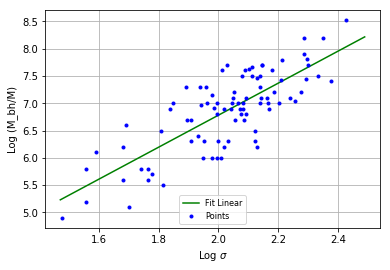

In [3]:
sumx = sum(l_s)
sumy = sum(l)
sumx_2 = sum(l_s**2)
sumxy = sum(l*l_s)

a_1 = (sumy*sumx_2 - sumx*sumxy)/(n*sumx_2 - (sumx)**2)
a_2 = (n*sumxy - sumx*sumy)/(n*sumx_2 - (sumx)**2)

z = np.arange(1.47,2.5,0.01)

def f(a_1,a_2):
    f = a_1 + a_2*z
    return f

plt.grid()

plt.xlabel('Log $\sigma$')
plt.ylabel('Log (M_bh/M)')

plt.plot(z,f(a_1,a_2),'g')
plt.plot(l_s,l,'b.')


plt.legend(('Fit Linear','Points'),prop = {'size':8}, loc = 'lower center')

$Con\ error\ en\ Log\ \sigma$

<class 'pandas.core.series.Series'>


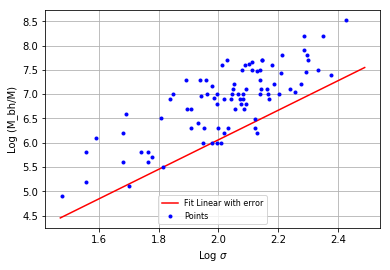

In [4]:
l_s_i = np.log10(s_i)    ## Logaritmo del error

print(type(l_s_i))

s = sum(1/l_s_i**2)
isumx = sum(l_s/l_s_i**2)
isumy = sum(l/l_s_i**2)
isumx_2 = sum(l_s**2/l_s_i**2)
isumxy = sum(l*l_s/l_s_i**2)

ia_1 = (isumy*isumx_2 - isumx*isumxy)/(isumx_2 - (isumx)**2)
ia_2 = (s*isumxy - isumx*isumy)/(s*isumx_2 - (isumx)**2)


plt.grid()

plt.xlabel('Log $\sigma$')
plt.ylabel('Log (M_bh/M)')

plt.plot(z,f(ia_1,ia_2),'r')
plt.plot(l_s,l,'b.')


plt.legend(('Fit Linear with error','Points'),prop = {'size':8}, loc = 'lower center')

$ Con\ error\ en\ Log\ \sigma y\ en\ log\ M $

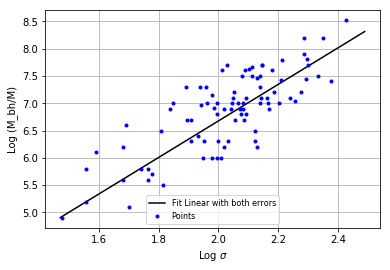

In [11]:
d_yx = [0]*n       ## Defino la derivada numerica

d_yx[0] = (l[1]-l[0])/(2*(l_s[1]-l_s[0]))
d_yx[n-1] = (l[n-1]-l[n-2])/(2*(l_s[n-1]-l_s[n-2]))


for i in range(1,n-2):
    if l_s[i] == l_s[i+1]:
       d_yx[i] = d_yx[i-1]
    else:
       d_yx[i] = (l[i+1]-l[i-1])/(2*(l_s[i+1]-l_s[i]))



s_e = [0]*n                ## Sigma extra
s_t = [0]*n                ## Sigma total


for i in range(0,n):
    s_e[i] = d_yx[i]*l_s_i[i]
    s_t[i] = l_in[i]**2 + s_e[i]**2
    
s_ta = np.asarray(s_t)               ## convertir a array
l_s = np.asarray(l_s)
l = np.asarray(l)

ts = sum(1/s_ta**2)
tisumx = sum(l_s/s_ta**2)
tisumy = sum(l/s_ta**2)
tisumx_2 = sum(l_s**2/s_ta**2)
tisumxy = sum((l*l_s)/s_ta**2)



tia_1 = (tisumy*tisumx_2 - tisumx*tisumxy)/(tisumx_2 - (tisumx)**2)
tia_2 = (s*tisumxy - tisumx*tisumy)/(s*tisumx_2 - (tisumx)**2)

plt.grid()

plt.xlabel('Log $\sigma$')
plt.ylabel('Log (M_bh/M)')

plt.plot(z,f(tia_1,tia_2),'k')
plt.plot(l_s,l,'b.')


plt.legend(('Fit Linear with both errors','Points'),prop = {'size':8}, loc = 'lower center')

    
